<a href="https://colab.research.google.com/github/dr-mushtaq/Python-Notes/blob/master/Model_Interpretability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Table of Content**</p>



*   ExplainerDashboard
*   Shap
*   InterpretML
*   Dalex
*   Lime
*   ELi5



#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**1-ExplainerDashboard**</p>

In [ ]:
pip install explainerdashboard


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from explainerdashboard import ClassifierExplainer, ExplainerDashboard # This import should work now
import pandas as pd # Import pandas
# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target
feature_names = data.feature_names
class_names = data.target_names
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Convert X_train and X_test to Pandas DataFrames with column names
X_train = pd.DataFrame(X_train, columns=feature_names) # Convert to DataFrame
X_test = pd.DataFrame(X_test, columns=feature_names) # Convert to DataFrame
# Train a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
explainer = ClassifierExplainer(model, X_test, y_test)
ExplainerDashboard(explainer).run()

Note: model_output=='probability', so assuming that raw shap output of DecisionTreeClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


/usr/local/lib/python3.10/dist-packages/dash/dash.py:579: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating shap interaction values... (this may take a while)
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating predictions...
Calculating pred_percentiles...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://172.28.0.12:8050
You can terminate the dashboard with ExplainerDashboard.terminate(

<IPython.core.display.Javascript object>

Dash app running on:
Try `serve_kernel_port_as_iframe` instead. 


<IPython.core.display.Javascript object>

#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**2-SHAP**</p>

In [ ]:
pip install shap


In [ ]:
import xgboost
import shap

# train an XGBoost model
X, y = shap.datasets.california()
model = xgboost.XGBRegressor().fit(X, y)

In [ ]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

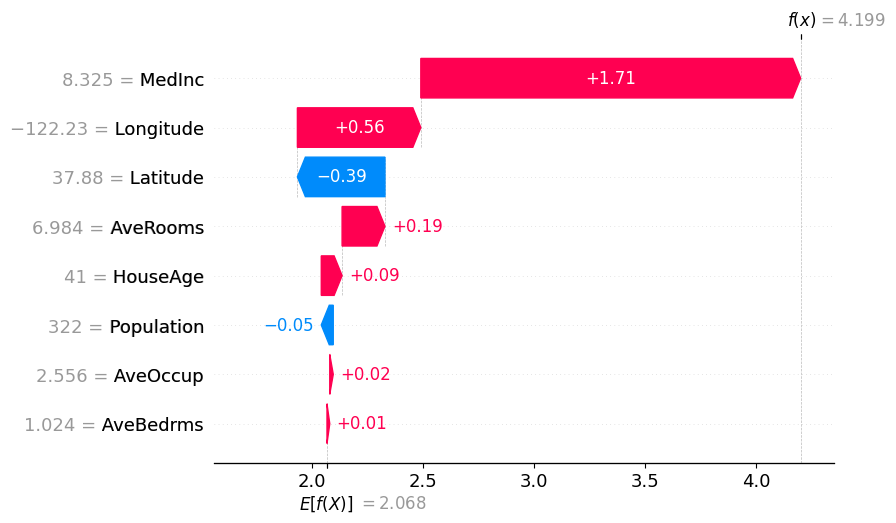

In [ ]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [ ]:
shap.initjs()


In [ ]:
# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[0])

In [ ]:
# visualize all the training set predictions
shap.plots.force(shap_values[:500])

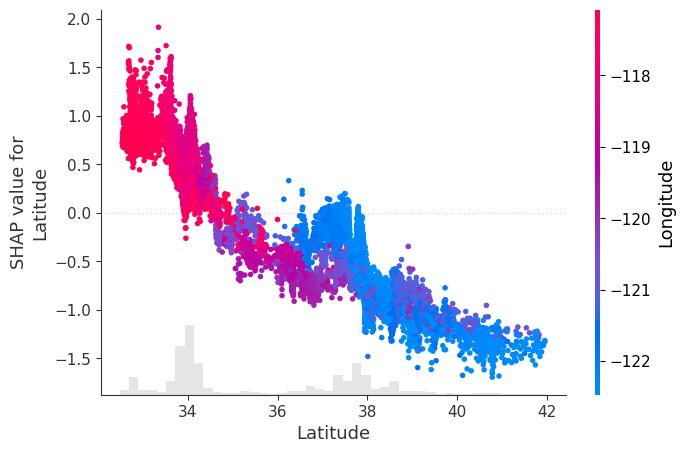

In [ ]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "Latitude"], color=shap_values)

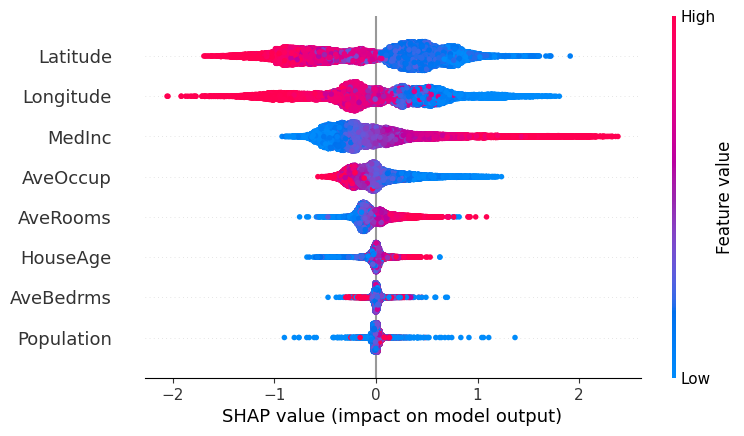

In [ ]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

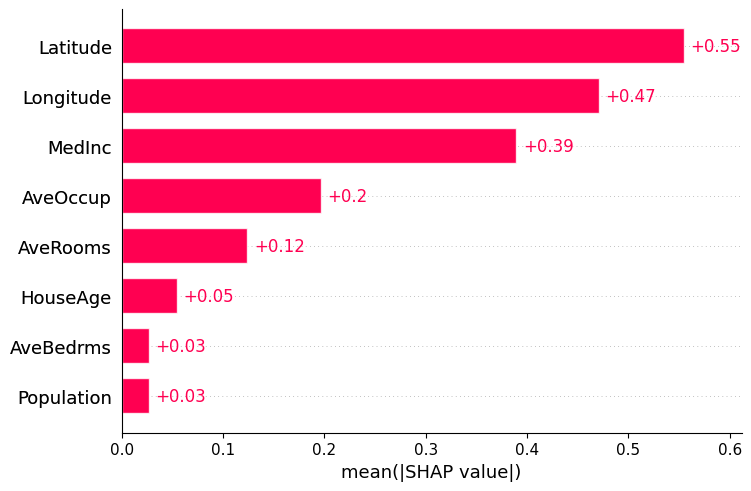

In [ ]:
shap.plots.bar(shap_values)


#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**3-InterpretML**</p>

In [ ]:
!pip install interpret

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from interpret.glassbox import LogisticRegression as InterpretableLR
from interpret import show

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an interpretable logistic regression model
interpretable_lr = InterpretableLR(random_state=42)
interpretable_lr.fit(X_train, y_train)

# Model performance
accuracy = interpretable_lr.score(X_test, y_test)
print(f"Interpretable Logistic Regression Test Accuracy: {accuracy:.2f}")

# Global explanation: Feature importance
global_explanation = interpretable_lr.explain_global(name="Breast Cancer Feature Importance")
show(global_explanation)

# Local explanation for a single prediction
sample_idx = 5  # Change this index to analyze different samples
local_explanation = interpretable_lr.explain_local(X_test[sample_idx:sample_idx+1], y_test[sample_idx:sample_idx+1])
show(local_explanation)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Interpretable Logistic Regression Test Accuracy: 0.97


#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**4-Dalex**</p>

In [ ]:
pip install dalex

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from dalex import Explainer

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from dalex import Explainer
import matplotlib.pyplot as plt

In [ ]:
# Sample data (replace with your own)
data = {'feature1': [1, 2, 3, 4, 5], 'feature2': [2, 4, 1, 3, 5], 'target': [3, 6, 4, 7, 10]}
df = pd.DataFrame(data)
X = df[['feature1', 'feature2']]
y = df['target']

In [ ]:
# Train a linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
# Create a Dalex explainer
explainer = Explainer(model, X, y)

# Generate variable importance
variable_importance = explainer.model_parts()
print(variable_importance)

In [ ]:
explainer.model_profile().plot()

In [ ]:
# Generate variable importance
variable_importance = explainer.model_parts()
print(variable_importance)
variable_importance.plot()

# Import matplotlib.pyplot and save the figure
import matplotlib.pyplot as plt  # Import the necessary module
plt.savefig('variable_importance.png')

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from dalex import Explainer
import matplotlib.pyplot as plt

# ... (your existing code to create the explainer) ...

# Generate partial dependence plots
pdp = explainer.model_profile(type='conditional') # Use model_profile instead of partial_dependence
pdp.plot()
plt.savefig('partial_dependence.png')


In [ ]:
# Generate accumulated local effects plots
ale_plots = explainer.model_parts(type='ale') # Use model_parts for ALE plots
ale_plots.plot()
plt.savefig('ale_plots.png')

In [ ]:
# Generate break down plots
breakdown = explainer.predict_parts(new_observation=X.iloc[[0]], type='break_down') # Change 'breakdown' to 'break_down'
breakdown.plot()
plt.savefig('breakdown_plots.png')

<Figure size 640x480 with 0 Axes>

In [ ]:
# Model Diagnostics
explainer.model_diagnostics().result

,feature1,feature2,y,y_hat,residuals,abs_residuals,label,ids
0,1,2,3,3.0,8.881784e-16,8.881784e-16,LinearRegression,1
1,2,4,6,6.0,-8.881784e-16,8.881784e-16,LinearRegression,2
2,3,1,4,4.0,1.776357e-15,1.776357e-15,LinearRegression,3
3,4,3,7,7.0,0.000000e+00,0.000000e+00,LinearRegression,4
4,5,5,10,10.0,0.000000e+00,0.000000e+00,LinearRegression,5


In [ ]:
explainer.model_performance()

,mse,rmse,r2,mae,mad
LinearRegression,9.466331e-31,9.729507e-16,1.0,7.105427e-16,8.881784e-16


In [ ]:
# Plot Explanation of Prediction
explainer.plot()

AttributeError: 'Explainer' object has no attribute 'plot'

In [ ]:
explainer.model_parts().plot()
explainer.model_profile().plot()

Calculating ceteris paribus:   0%|          | 0/2 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.   1.04 1.08 1.12 1.16 1.2  1.24 1.28 1.32 1.36 1.4  1.44 1.48 1.52
 1.56 1.6  1.64 1.68 1.72 1.76 1.8  1.84 1.88 1.92 1.96 2.   2.04 2.08
 2.12 2.16 2.2  2.24 2.28 2.32 2.36 2.4  2.44 2.48 2.52 2.56 2.6  2.64
 2.68 2.72 2.76 2.8  2.84 2.88 2.92 2.96 3.   3.04 3.08 3.12 3.16 3.2
 3.24 3.28 3.32 3.36 3.4  3.44 3.48 3.52 3.56 3.6  3.64 3.68 3.72 3.76
 3.8  3.84 3.88 3.92 3.96 4.   4.04 4.08 4.12 4.16 4.2  4.24 4.28 4.32
 4.36 4.4  4.44 4.48 4.52 4.56 4.6  4.64 4.68 4.72 4.76 4.8  4.84 4.88
 4.92 4.96 5.   1.   1.04 1.08 1.12 1.16 1.2  1.24 1.28 1.32 1.36 1.4
 1.44 1.48 1.52 1.56 1.6  1.64 1.68 1.72 1.76 1.8  1.84 1.88 1.92 1.96
 2.   2.04 2.08 2.12 2.16 2.2  2.24 2.28 2.32 2.36 2.4  2.44 2.48 2.52
 2.56 2.6

#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**5-Lime**</p>

In [ ]:
pip install lime

**Step 1: Import Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from lime.lime_tabular import LimeTabularExplainer

**Step 2: Load and Prepare Data**

In [ ]:
# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Step 3: Train a Machine Learning Model**

In [ ]:
# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Step 4: Explain a Prediction with LIME**

In [ ]:
# Create a LIME explainer
explainer = LimeTabularExplainer(X_train, feature_names=feature_names, class_names=class_names, discretize_continuous=True)

# Select an instance to explain
idx = 0  # Choosing the first test sample
instance = X_test[idx]

# Generate explanation
exp = explainer.explain_instance(instance, model.predict_proba, num_features=4)

# Show the explanation
exp.show_in_notebook()

#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**6-ELi5**</p>

**Installation**

In [ ]:
pip install eli5

In [ ]:
!pip install -U scikit-learn
!pip install -U eli5

In [ ]:
!pip install scikit-learn==1.2.2 # Downgrade scikit-learn to a compatible version
!pip install eli5~=0.13.0 # Install a compatible version of eli5


**Example: Explaining a Logistic Regression Model on the Iris Dataset**

**Step 1: Import Required Libraries**

In [ ]:
import numpy as np
import pandas as pd
import eli5
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

**Step 2: Load and Prepare the Dataset**

In [2]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Step 3: Train a Logistic Regression Model**

In [3]:
# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

**Step 4: Explain the Model Predictions with ELI5**

In [4]:
import eli5
from eli5.sklearn import explain_weights
# Display feature importance
eli5.show_weights(model, feature_names=iris.feature_names)

**Step 5: Explain a Single Prediction**

In [5]:
from eli5.sklearn import explain_prediction

# Explain prediction for a test instance
eli5.show_prediction(model, X_test[0], feature_names=iris.feature_names)

#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**References**</p>